In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain

## fix random_state for reproducibility
random_state = 42

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3, random_state=random_state)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
89645,00022260_003.png,No Finding,3,22260,54,F,PA,2542,2434,0.143,0.143,NaN
47446,00012048_007.png,Infiltration|Mass|Nodule,7,12048,65,M,AP,2500,2048,0.168,0.168,NaN
57963,00014352_005.png,No Finding,5,14352,6,M,PA,2992,2033,0.143,0.143,NaN


In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3, random_state=random_state)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2146,00011065_007.png,No Finding,7,11065,066Y,M,PA,2992,2991,0.143,0.143
1879,00009892_001.png,No Finding,1,9892,062Y,F,PA,2992,2991,0.143,0.143
346,00001836_076.png,Mass|Nodule,76,1836,050Y,F,AP,2500,2048,0.168,0.168


In [4]:
sample_df_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data', 'images*', '*', '*.png'))}
sample_df['path'] = sample_df['Image Index'].map(sample_df_paths.get)
sample_df.sample(3, random_state=random_state)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
2146,00011065_007.png,No Finding,7,11065,066Y,M,PA,2992,2991,0.143,0.143,/data/images_005/images/00011065_007.png
1879,00009892_001.png,No Finding,1,9892,062Y,F,PA,2992,2991,0.143,0.143,/data/images_005/images/00009892_001.png
346,00001836_076.png,Mass|Nodule,76,1836,050Y,F,AP,2500,2048,0.168,0.168,/data/images_002/images/00001836_076.png


In [5]:
## EDA
# Todo 

### Split combined findings and append as labels to the dataset

In [6]:
labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
labels = [label for label in labels if label != 'No Finding']
for label in labels:
    all_xray_df[label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)
    print('%s: %d'%(label, int(all_xray_df[label].sum())))

Atelectasis: 11559
Cardiomegaly: 2776
Consolidation: 4667
Edema: 2303
Effusion: 13317
Emphysema: 2516
Fibrosis: 1686
Hernia: 227
Infiltration: 19894
Mass: 5782
Nodule: 6331
Pleural_Thickening: 3385
Pneumonia: 1431
Pneumothorax: 5302


The dominant finding is infiltration, followed by effusion and then atelectasis

In [7]:
all_xray_df.sample(5, random_state=random_state)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
89645,00022260_003.png,No Finding,3,22260,54,F,PA,2542,2434,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47446,00012048_007.png,Infiltration|Mass|Nodule,7,12048,65,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
57963,00014352_005.png,No Finding,5,14352,6,M,PA,2992,2033,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22863,00006040_001.png,No Finding,1,6040,18,F,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43431,00011202_002.png,No Finding,2,11202,19,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Demographic distribution of findings

#### Distribution by Gender

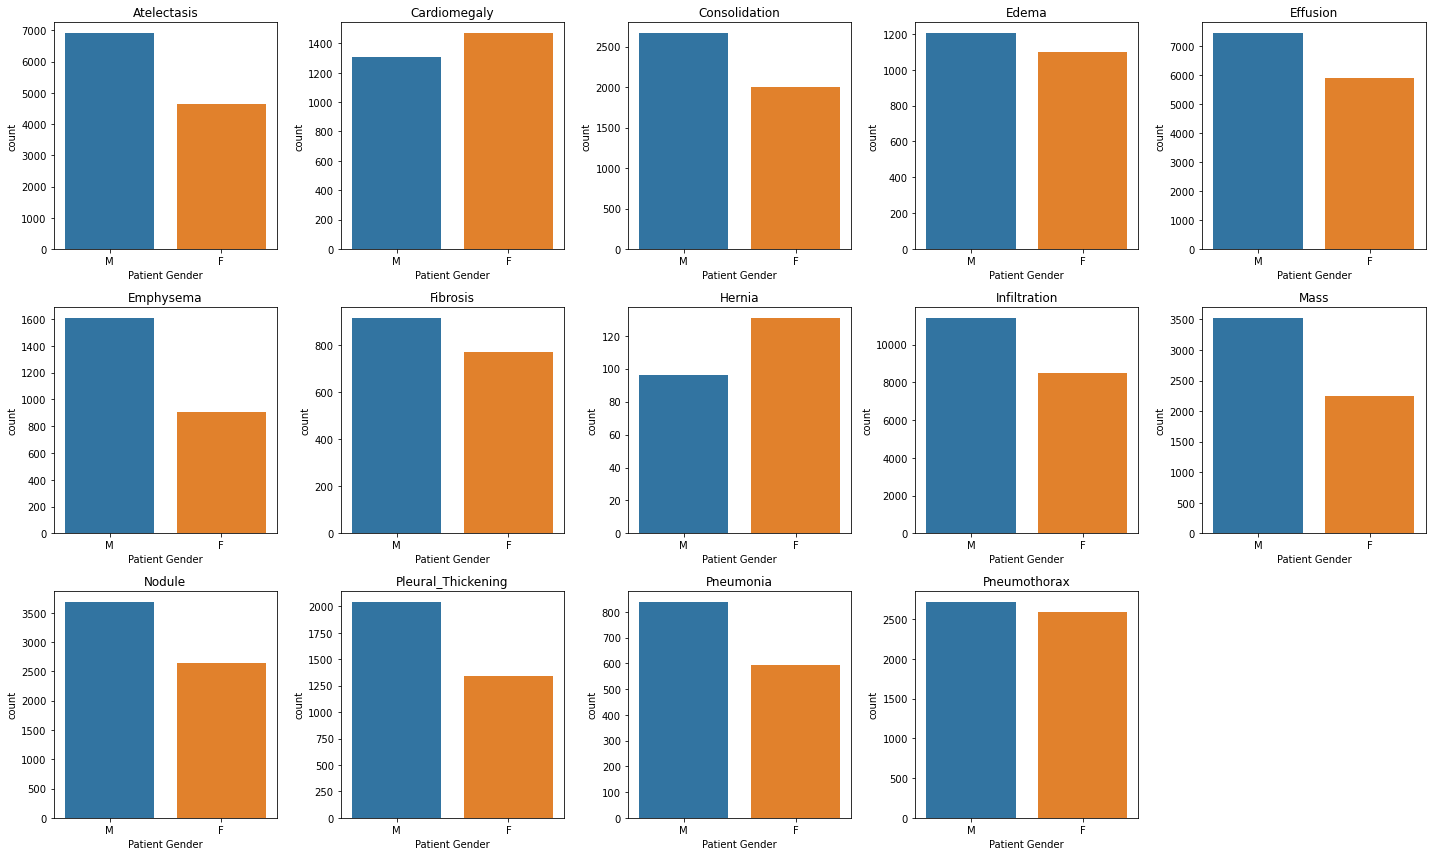

In [8]:
fig = plt.subplots(figsize = (20, 12))
for ind, label in enumerate(labels):
    plt.subplot(3, 5, ind+1)
    #ax = all_xray_df[all_xray_df[label] == 1.0]['Patient Gender'].value_counts().plot(kind='bar')
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x='Patient Gender',data = all_xray_df[all_xray_df[label] == 1], order=['M', 'F'])#, hue='Patient Gender')
    plt.title(label)
    plt.tight_layout()

In [9]:
# comments on the above plots
for label in labels:
    male_counts = all_xray_df[all_xray_df['Patient Gender'] == 'M'][label].sum()
    female_counts = all_xray_df[all_xray_df['Patient Gender'] == 'F'][label].sum()
    if male_counts < female_counts:
        print('%s has more female patients than male\n'%(label))
    elif male_counts > female_counts:
        print('%s has less female patients than male\n'%(label))
    else:
        print('%s has equal number of female and male patients\n'%(label))

Atelectasis has less female patients than male

Cardiomegaly has more female patients than male

Consolidation has less female patients than male

Edema has less female patients than male

Effusion has less female patients than male

Emphysema has less female patients than male

Fibrosis has less female patients than male

Hernia has more female patients than male

Infiltration has less female patients than male

Mass has less female patients than male

Nodule has less female patients than male

Pleural_Thickening has less female patients than male

Pneumonia has less female patients than male

Pneumothorax has less female patients than male



#### Distribution by age

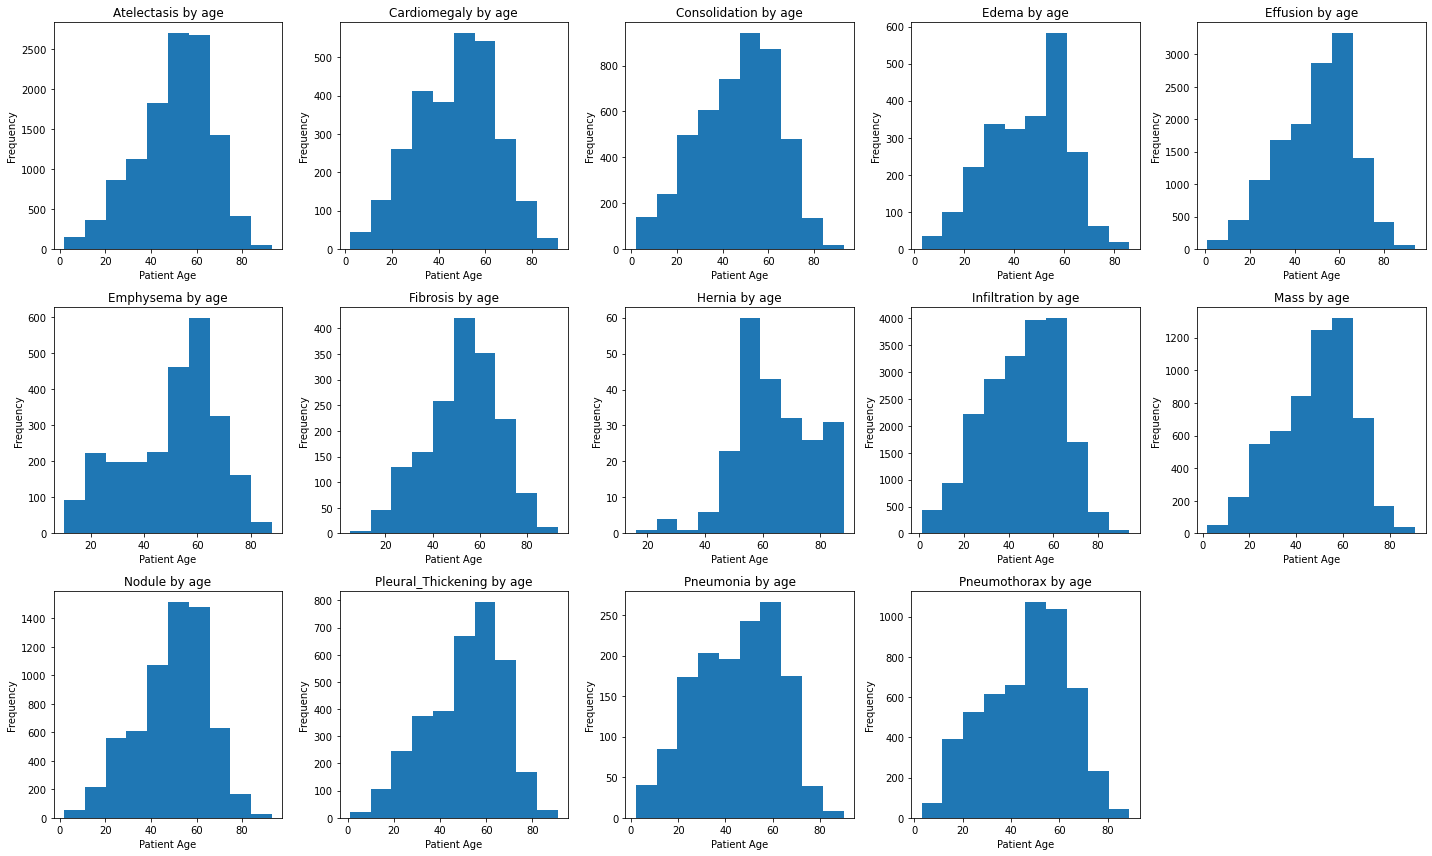

In [10]:
# I adopt a cut-off of 140 years for age
age_mask = all_xray_df[all_xray_df['Patient Age'] < 140]

# Now, let's see the age distribution for each disease
fig = plt.subplots(figsize = (20, 12))
for ind, label in enumerate(labels):
    plt.subplot(3, 5, ind+1)
    #ax = all_xray_df[all_xray_df[label] == 1.0]['Patient Gender'].value_counts().plot(kind='bar')
    plt.subplots_adjust(hspace = 1.0)
    plt.hist(age_mask[age_mask[label] == 1.0]['Patient Age'])
    plt.xlabel('Patient Age')
    plt.ylabel('Frequency')
    plt.title('%s by age'%label)
    plt.tight_layout()

Age ranges from 5 - 95 years for all diseases with patients aged 20 - 70 years dominant for all the diseases (except Hernia)

### 2. Distribution by View Position

Text(0, 0.5, 'Number of images with findings')

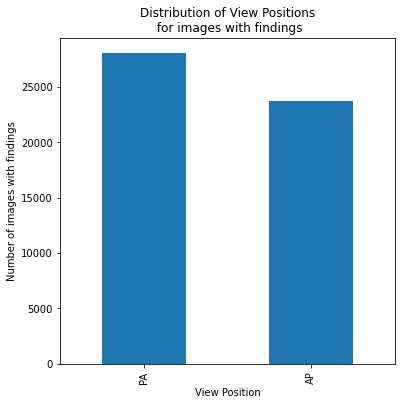

In [11]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df['Finding Labels'] != 'No Finding']['View Position'].value_counts().plot(kind='bar')
plt.title('Distribution of View Positions\n for images with findings')
plt.xlabel('View Position')
plt.ylabel('Number of images with findings')

The are more PA views acquired than AP views.

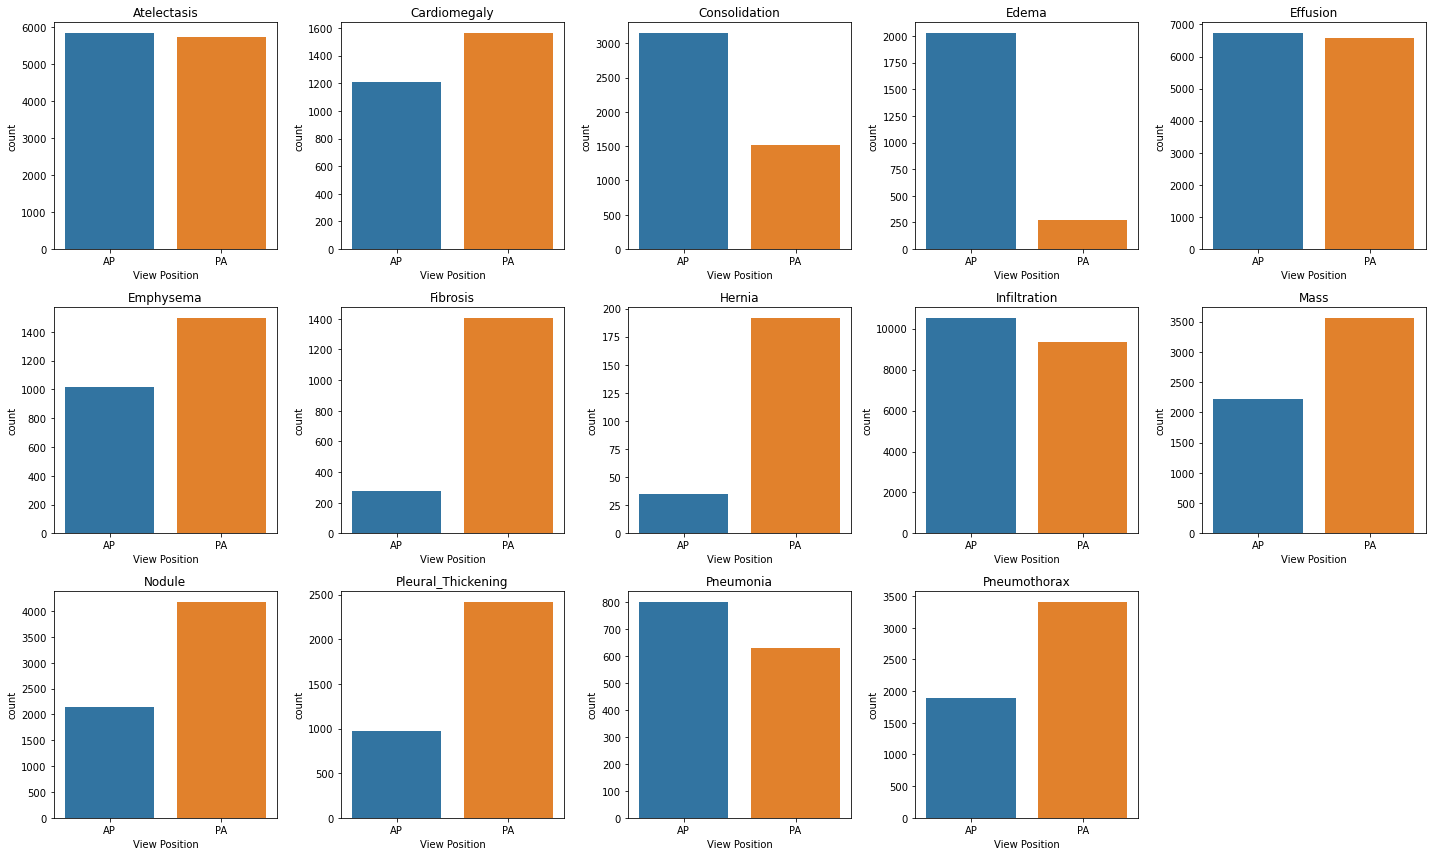

In [12]:
# Distribution of view positions for each disease
fig = plt.subplots(figsize = (20, 12))
for ind, label in enumerate(labels):
    plt.subplot(3, 5, ind+1)
    #ax = all_xray_df[all_xray_df[label] == 1.0]['Patient Gender'].value_counts().plot(kind='bar')
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x='View Position',data = all_xray_df[all_xray_df[label] == 1], order=['AP', 'PA'])
    plt.title(label)
    plt.tight_layout()

In [13]:
for label in labels:
    AP_views = all_xray_df[all_xray_df['View Position'] == 'AP'][label].sum()
    PA_views = all_xray_df[all_xray_df['View Position'] == 'PA'][label].sum()
    if AP_views < PA_views:
        print('%s has more PA views than AP views\n'%(label))
    elif AP_views > PA_views:
        print('%s has less PA views than AP views\n'%(label))
    else:
        print('%s has equal number of AP and PA views\n'%(label))

Atelectasis has less PA views than AP views

Cardiomegaly has more PA views than AP views

Consolidation has less PA views than AP views

Edema has less PA views than AP views

Effusion has less PA views than AP views

Emphysema has more PA views than AP views

Fibrosis has more PA views than AP views

Hernia has more PA views than AP views

Infiltration has less PA views than AP views

Mass has more PA views than AP views

Nodule has more PA views than AP views

Pleural_Thickening has more PA views than AP views

Pneumonia has less PA views than AP views

Pneumothorax has more PA views than AP views



### 3. Number of Cases

#### Pneumonia cases

In [14]:
print('Number of pneumonia cases = %d'%all_xray_df['Pneumonia'].sum())

Number of pneumonia cases = 1431


#### Non - pneumonia cases

In [15]:
Non_Pneumonia_Cases = 0
for label in labels:
    if label != 'Pneumonia':
        print('Number of %s cases = %d'%(label, all_xray_df[label].sum()))
        Non_Pneumonia_Cases += all_xray_df[label].sum()
print('\n')
print("Total number of non-pneumonia cases = %d" %Non_Pneumonia_Cases)

Number of Atelectasis cases = 11559
Number of Cardiomegaly cases = 2776
Number of Consolidation cases = 4667
Number of Edema cases = 2303
Number of Effusion cases = 13317
Number of Emphysema cases = 2516
Number of Fibrosis cases = 1686
Number of Hernia cases = 227
Number of Infiltration cases = 19894
Number of Mass cases = 5782
Number of Nodule cases = 6331
Number of Pleural_Thickening cases = 3385
Number of Pneumothorax cases = 5302


Total number of non-pneumonia cases = 79745


### 4. The distribution of other diseases that are comorbid with pneumonia

In [16]:
all_xray_df[all_xray_df.Pneumonia==1][labels].sum()

Atelectasis            262.0
Cardiomegaly            41.0
Consolidation          123.0
Edema                  340.0
Effusion               269.0
Emphysema               23.0
Fibrosis                11.0
Hernia                   3.0
Infiltration           605.0
Mass                    71.0
Nodule                  70.0
Pleural_Thickening      48.0
Pneumonia             1431.0
Pneumothorax            41.0
dtype: float64

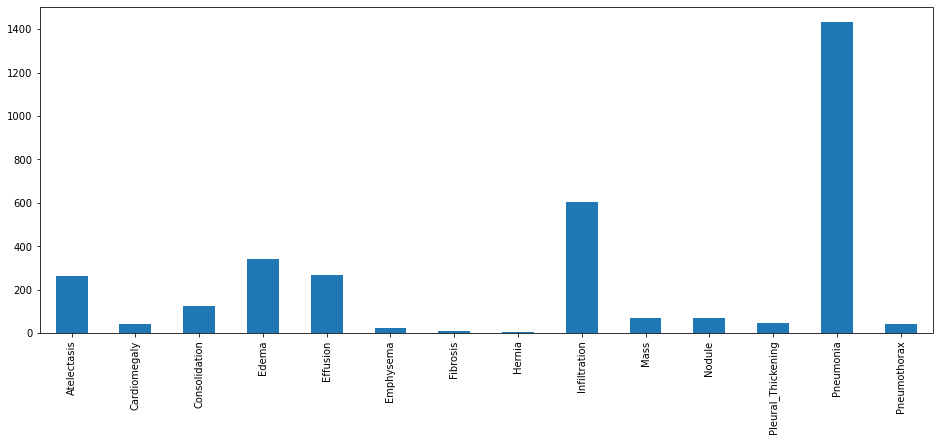

In [17]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1][labels].sum().plot(kind='bar')

This shows that infiltration, edema, effusion, atelectasis and consolidation are the top diseases that cormobid with pneumonia. At least these five diseases should have balanced representations in the training and validation datasets.

### 5. Number of diseases per patient

In [18]:
diseases_per_patient = all_xray_df.groupby(['Patient ID'])[labels].sum()
diseases_per_patient['disease_count'] = diseases_per_patient.astype(bool).sum(axis=1)
diseases_per_patient.sample(3, random_state=random_state)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_count
Patient ID,,,,,,,,,,,,,,,
12681,8.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,7
13125,3.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5
29707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Text(0, 0.5, 'Number of patients')

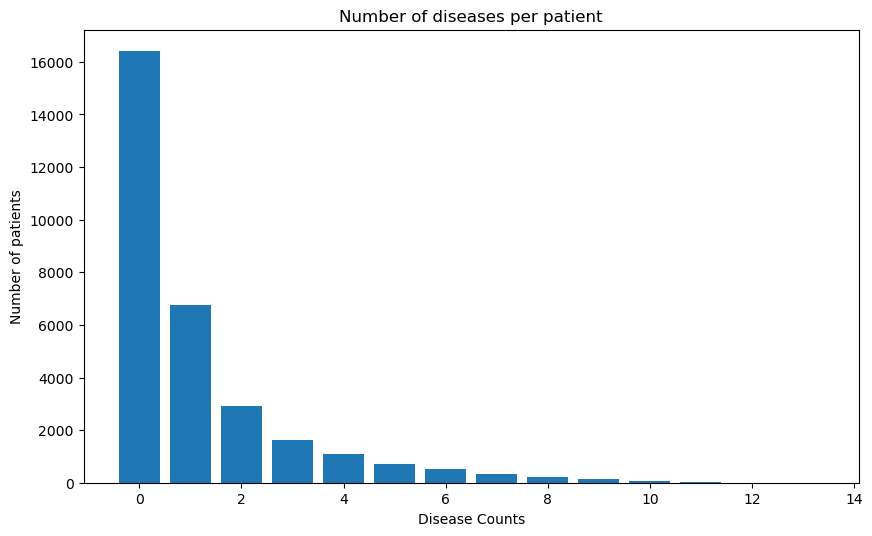

In [19]:
disease_count = diseases_per_patient['disease_count'].unique()
patient_count = [diseases_per_patient[diseases_per_patient['disease_count'] == item].count()[0]
                 for item in disease_count]
plt.figure(figsize = (10, 6), dpi = 100)
plt.bar(disease_count, patient_count)
plt.title('Number of diseases per patient')
plt.xlabel('Disease Counts')
plt.ylabel('Number of patients')

It is not clear from the plot if there are patients with more than 11 diseases co-existing. Better insights may be obtained by printing out the number of patients for each disease count.

In [20]:
for disease, patient in sorted(zip(disease_count, patient_count)):
    if disease <=1:
        print('%d patients have %d disease => %s of all patients\n'
              %(patient, disease, str(format(100*patient/np.sum(patient_count), '.3f')) + " %")
             )
    else:
        print('%d patients have %d diseases => %s of all patients\n'
              %(patient, disease, str(format(100*patient/np.sum(patient_count), '.3f')) + " %")
             )

16403 patients have 0 disease => 53.248 % of all patients
6742 patients have 1 disease => 21.886 % of all patients
2908 patients have 2 diseases => 9.440 % of all patients
1638 patients have 3 diseases => 5.317 % of all patients
1087 patients have 4 diseases => 3.529 % of all patients
707 patients have 5 diseases => 2.295 % of all patients
518 patients have 6 diseases => 1.682 % of all patients
335 patients have 7 diseases => 1.087 % of all patients
205 patients have 8 diseases => 0.665 % of all patients
139 patients have 9 diseases => 0.451 % of all patients
84 patients have 10 diseases => 0.273 % of all patients
28 patients have 11 diseases => 0.091 % of all patients
7 patients have 12 diseases => 0.023 % of all patients
4 patients have 13 diseases => 0.013 % of all patients


While more than half of the patients did not have any disease (no finding), some other patients suffer multiple diseases co-occuring. For example, 4 patients have 13 different diseases together.

Since more than 50% of the patients have zero disease, it would be necessary to drop some of the "no finding" images in order to create training and validation datasets.

### 6. Pixel-Level Assessment

In [21]:
sample_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
for name in sample_labels:
    sample_df[name] = sample_df['Finding Labels'].map(lambda finding: 1.0 if name in finding else 0)
    print('%s: %d'%(name, int(sample_df[name].sum())))

Atelectasis: 508
Cardiomegaly: 141
Consolidation: 226
Edema: 118
Effusion: 644
Emphysema: 127
Fibrosis: 84
Hernia: 13
Infiltration: 967
Mass: 284
No Finding: 3044
Nodule: 313
Pleural_Thickening: 176
Pneumonia: 62
Pneumothorax: 271


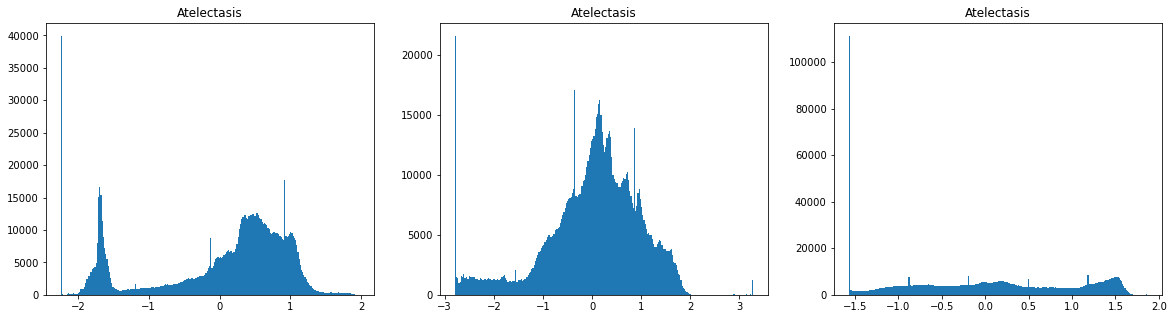

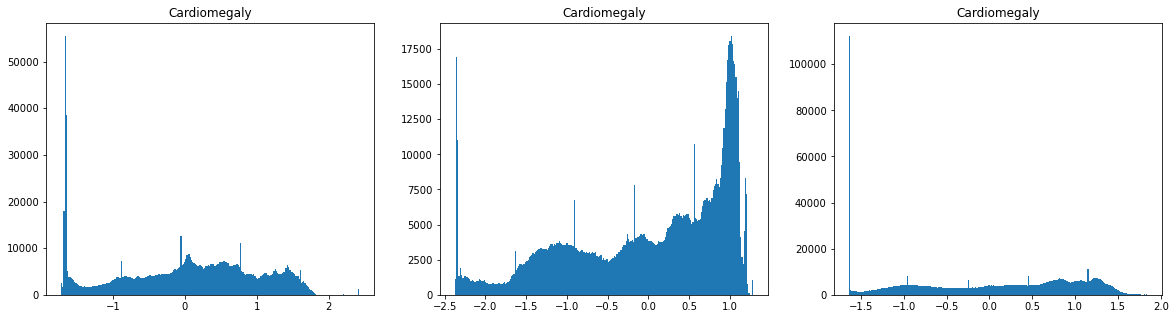

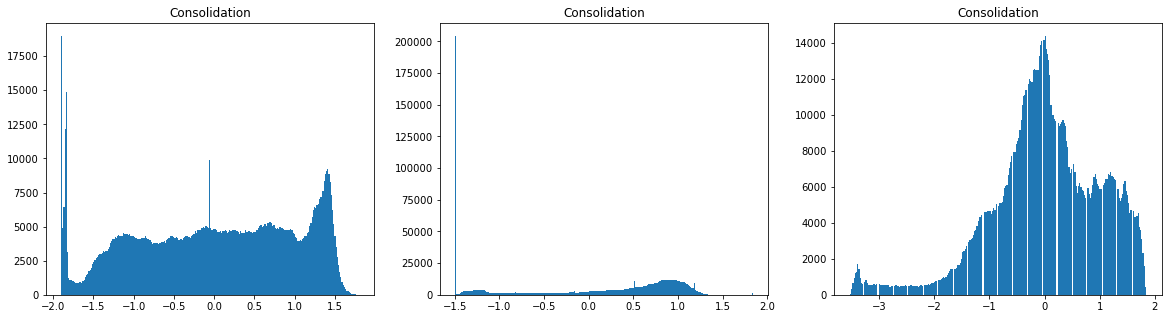

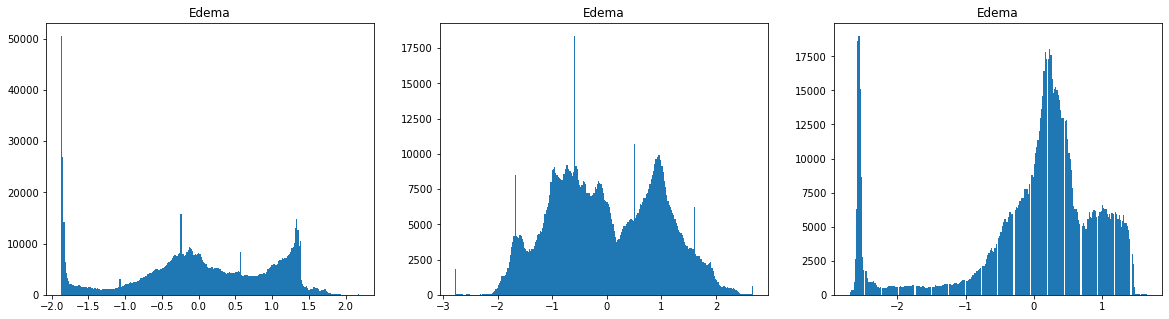

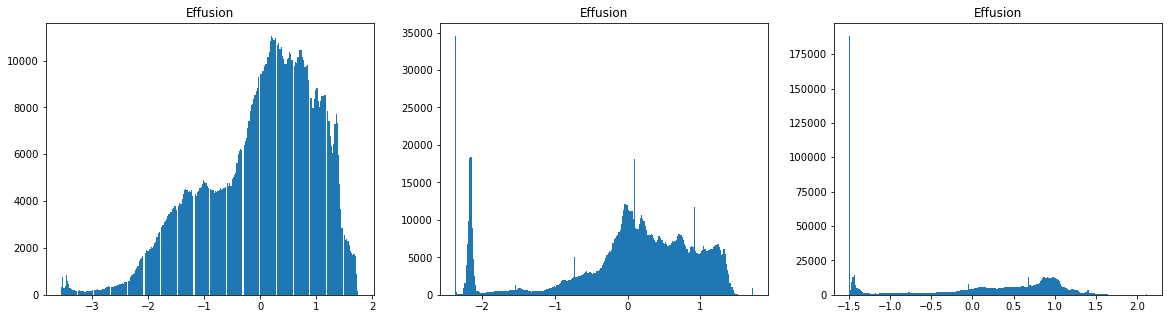

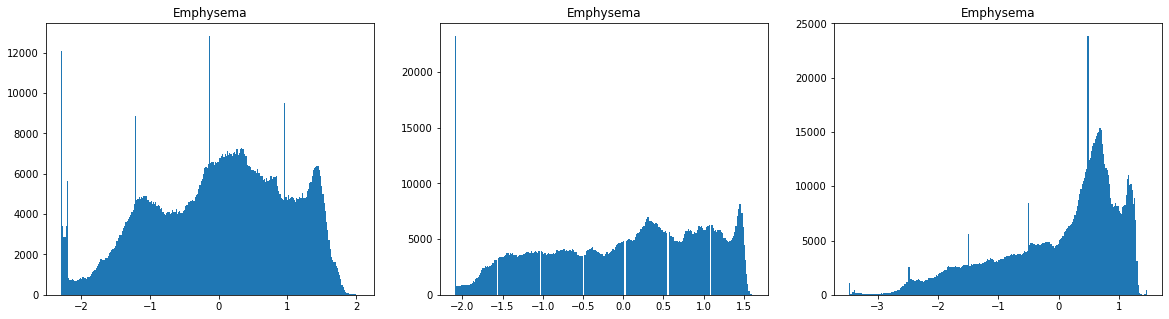

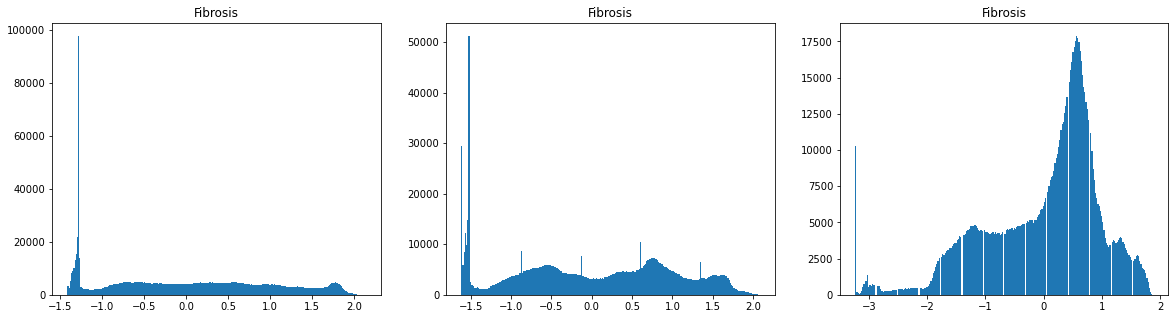

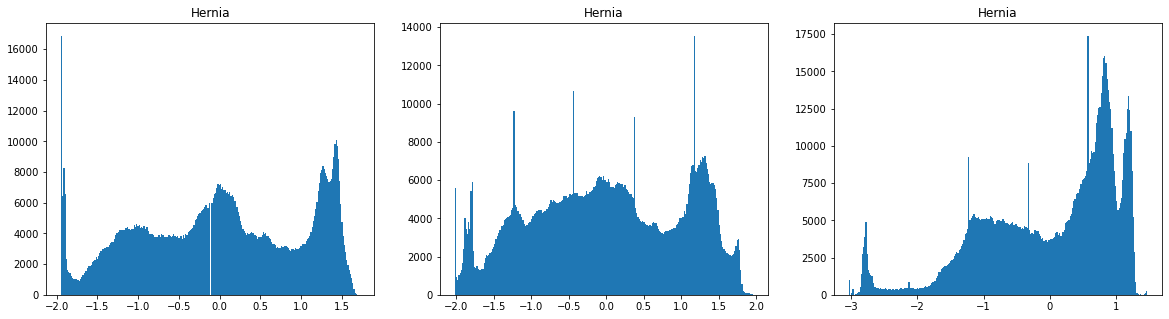

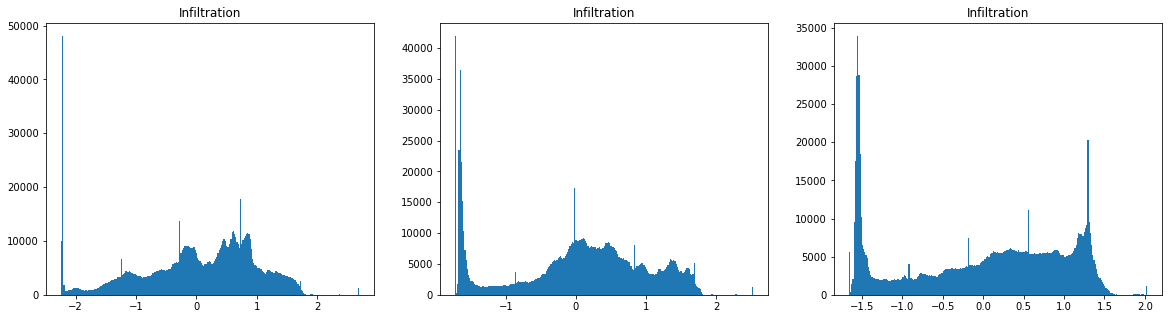

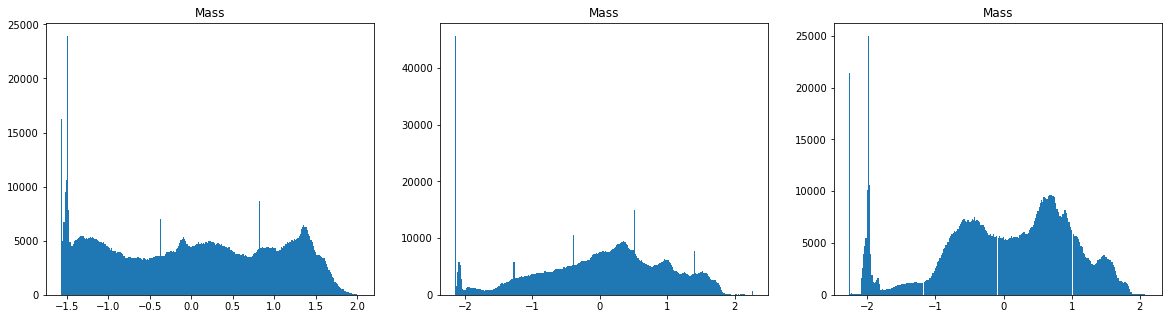

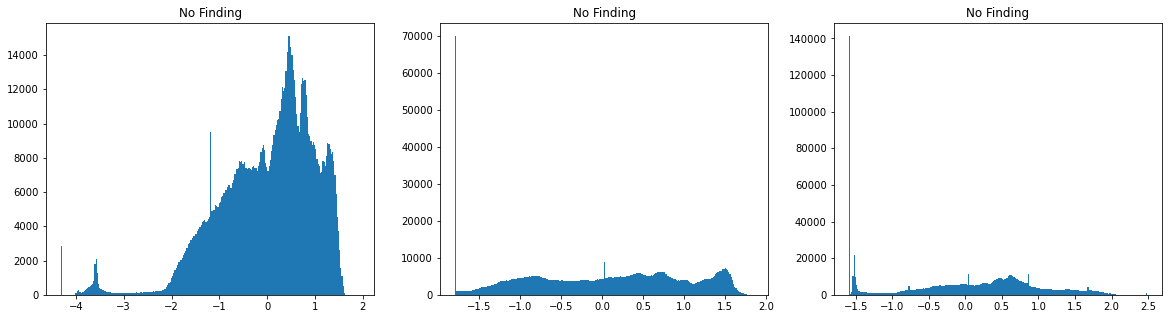

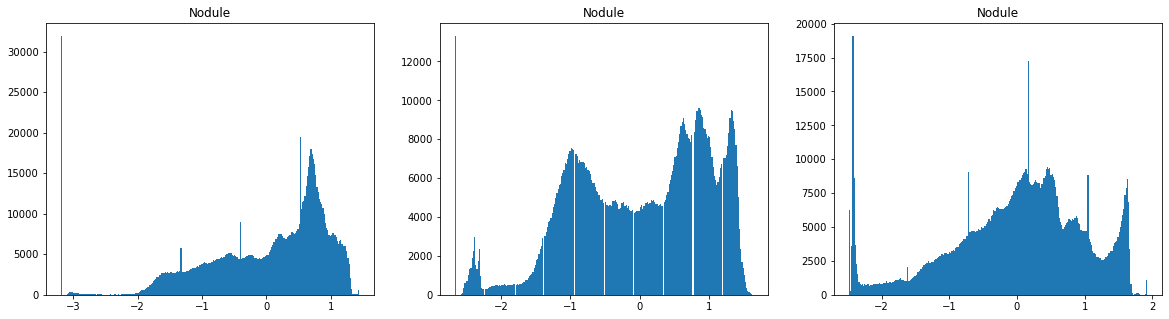

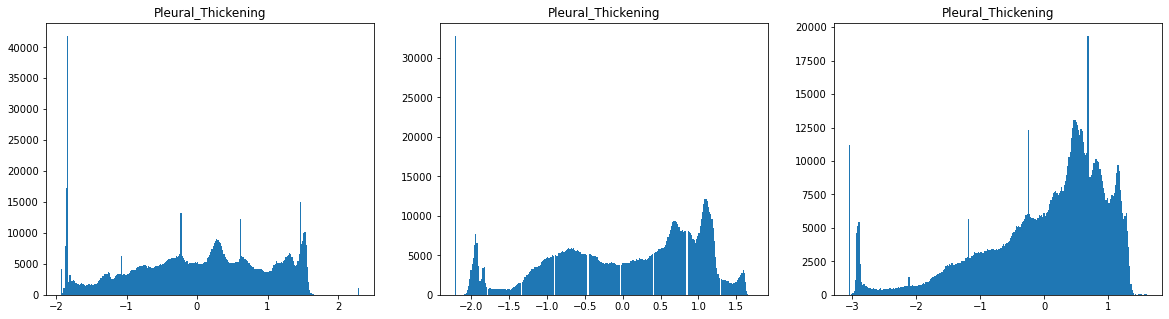

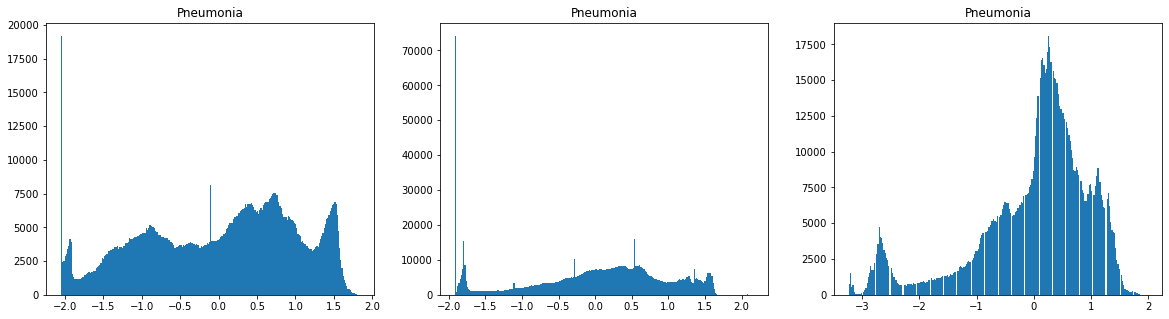

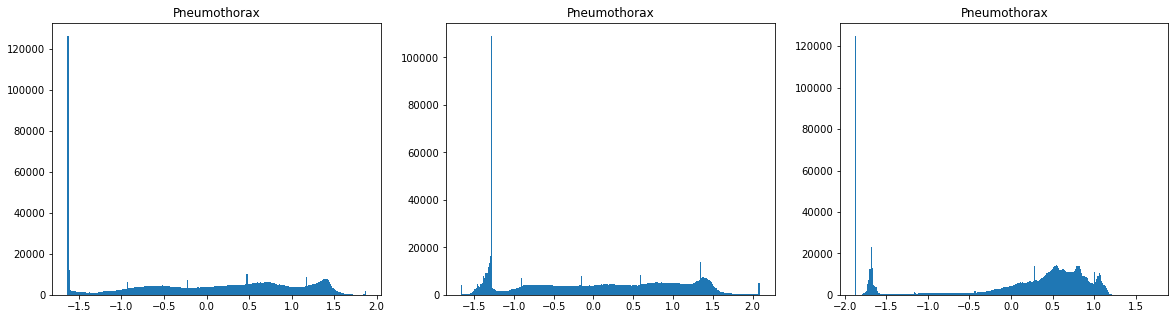

In [22]:
for name in sample_labels:
    img_path = sample_df[sample_df["Finding Labels"] == name].sample(3, random_state=random_state)["path"]
    plt.figure(figsize = (20, 5))
    for i in range(len(img_path)):
        plt.subplot(1, len(img_path), i + 1).set_title(name)
        var = plt.imread(img_path.iloc[i])
        plt.hist(((var - np.mean(var))/np.std(var)).ravel(), bins=250)

Some reviewer's comment (copied from https://knowledge.udacity.com/questions/242567):

In the conclusion section, some of the things you are expected to speak about are:

* Where peak occurs for each disease
* General shape of the distributions for each disease
* Random spikes in the distributions, if any, for each disease
* Continuity in the distributions for each disease
* Whether the distributions of two (or more) diseases are similar

However, feel free to use your own judgement as well, because EDA is very open-ended!